In [ ]:
import pandas as pd
import numpy as np
import CONSTANTS
from functions import *
import warnings
warnings.filterwarnings('ignore')

# Transformer

Objective: predict change in BTC price given features

## Prepare data
Create tupled dataset


In [ ]:
data = pd.read_csv(f'../{fullDataPath('BTC')}')
data['gradient'] = data['close'].diff().fillna(0.0)
data

In [ ]:
data['close'].plot.line(title='BTC Price', figsize=(12, 6), ylabel='Price (USD)', xlabel='Date')

In [ ]:
data['gradient'].plot.hist()

In [52]:
# Convert time to datetime if it's not already
data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna(subset=['time'])

# Extract date component
data['date'] = data['time'].dt.date

# Group by date and aggregate values (one row per day)
# Hard coded change later
daily_data = (
    data
    .groupby('date')
    .agg(
        close=('close', 'last'),  # Take the last close price of the day
        avg_sentiment=('score', 'mean'),  # Average sentiment for the day
        tweet_count=('score', 'count'),   # Number of observations per day
        gradient=('gradient', 'last'),     # Take the last gradient of the day
        volume=('volume', 'last'),          # Total volume for the day
        BB_Lower=('BB_Lower', 'last'),  # Last value of BB lower band
        BB_Middle=('BB_Middle', 'last'),  # Last value of BB middle band
        BB_Upper=('BB_Upper', 'last'),  # Last value of BB upper band
        SMA_20=('SMA_20', 'last'),  # Last value of SMA 20
        SMA_50=('SMA_50', 'last'),  # Last value of SMA 50
        Volume_MA_20=('Volume_MA_20', 'last'),  # Last value of Volume MA 20
        
    )
    .reset_index()
)

# Convert date back to datetime format if needed
daily_data['time'] = pd.to_datetime(daily_data['date'])
daily_data = daily_data.drop('date', axis=1)

# Sort by time
daily_data = daily_data.sort_values('time')
daily_data.set_index('time', inplace=True)
daily_data

,close,avg_sentiment,tweet_count,gradient,volume,BB_Lower,BB_Middle,BB_Upper,SMA_20,SMA_50,Volume_MA_20
time,,,,,,,,,,,
2024-06-10,69497.73,0.0,1,0.00,6088.403632,58918.218171,64462.8325,70007.446829,64462.8325,63358.5884,10009.565107
2024-06-11,67316.53,0.0,1,-2181.20,17354.689155,59062.416571,64121.3590,69180.301429,64121.3590,63292.0274,9918.306387
2024-06-12,68248.60,0.0,1,932.07,17140.011394,59040.832267,63897.0390,68753.245733,63897.0390,63237.8892,9666.907278
2024-06-13,66738.85,0.0,1,-1509.75,11916.132111,59123.849377,63586.6200,68049.390623,63586.6200,63178.6808,9344.338774
2024-06-14,66004.39,0.0,1,-734.46,11520.157919,58800.431456,63256.9280,67713.424544,63256.9280,63072.2650,9351.868007
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-05,101570.20,0.0,1,-3183.18,10615.733871,40026.834262,75487.7350,110948.635738,75487.7350,67144.2722,8963.375612
2025-06-06,104397.99,0.0,1,2827.79,9674.999986,39777.796875,73498.7105,107219.624125,73498.7105,66428.7766,9192.668042
2025-06-07,105619.02,0.0,1,1221.03,4141.101243,40498.165922,71319.6450,102141.124078,71319.6450,65699.2984,9278.557960


<Axes: title={'center': 'BTC Price'}, xlabel='Date', ylabel='Price (USD)'>

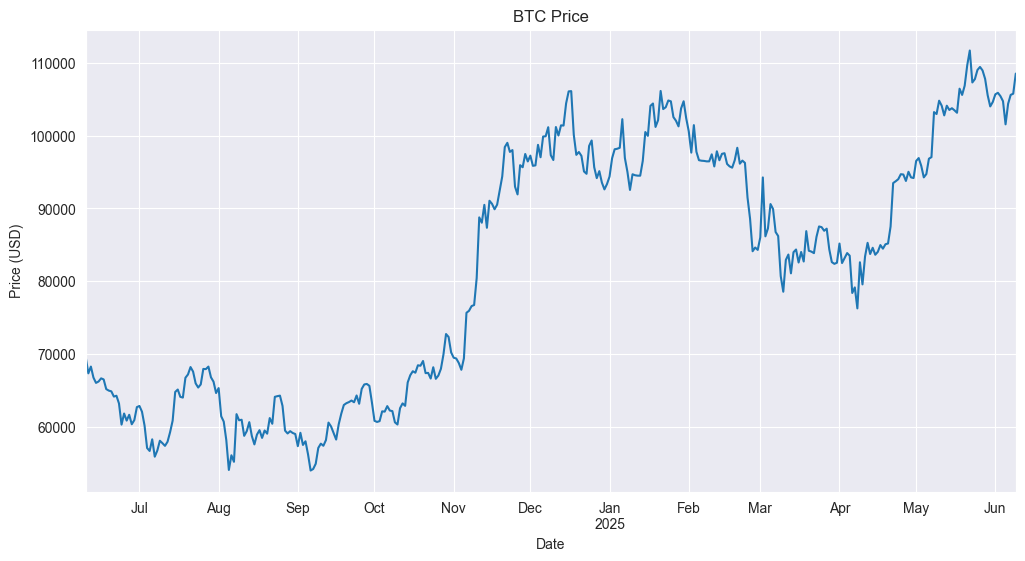

In [54]:
daily_data['close'].plot.line(title=f'{COIN} Price', figsize=(12, 6), ylabel='Price (USD)', xlabel='Date')

<Axes: ylabel='Frequency'>

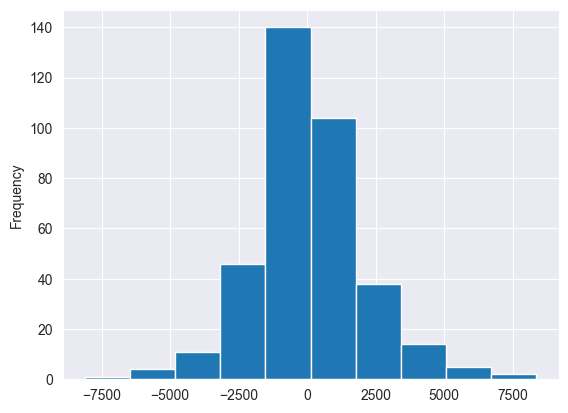

In [55]:
daily_data['gradient'].plot.hist()

# Load the Transformer Model

Sequence the data to make it predict the next price